<a href="https://colab.research.google.com/github/LosPowerPeralta/ADA-Informes-Matias/blob/main/Informe_MergeSort.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Problema de ordenamiento

Los problemas de ordenamiento desde hace mucho tiempo llevan siendo un desafío para los programadores ya que siempre se intenta buscar algún algoritmo el cual pueda resolverlos de la forma más rápida posible con el menor tiempo.

Por esta misma razón Martínez Vidal creo el metodo de ordenamiento por inserción el cual consiste en ordenar un arreglo de n números como si fuese un mazo de cartas.

Entrada: una secuencia de n números $[a_1, a_2,...,a_n]$

Salida: Retorna la misma secuencia de número ordenados de menor a mayor o viceversa.

#2. MergeSort


##2.1. Descripción del algoritmo

El MergeSort es un algoritmo recursivo el cual va dividiendo un arreglo de tamaño $n$ en sub-arreglos de largo $m = n/2$ hasta lograr un arreglo de tamaño 1, llegados a este punto la función llama a otra auxiliar llamada Merge la cual se encargará de reodenar los datos generados por los sub-arreglos recibidos hasta tener todos los datos ordenados del arreglo original de menor a mayor (o de mayor a menor dependiendo del caso).

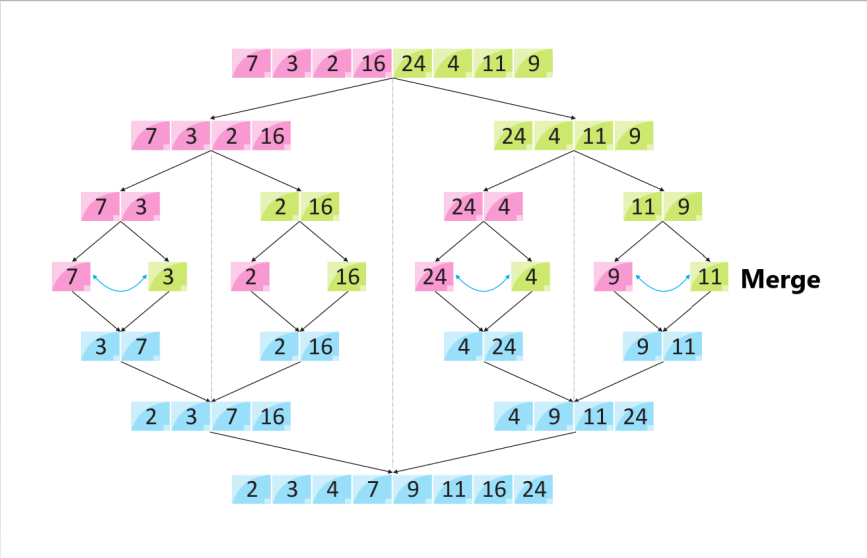

## 2.2. Codigo

In [2]:
import random 
import matplotlib.pyplot as plt
import datetime
from timeit import repeat
from termcolor import colored

In [68]:
def Merge(lista1, lista2, verbose = False):
  global cont
  i, j = 0, 0
  resultante = []

  if verbose:
    print("INGRESO DE LA FUNCIÓN MERGE\n")
    print("Entrada: Lista 1: ", str(lista1)[1:-1])
    print("         Lista 2: ", str(lista2)[1:-1], "\n")

  while (i < len(lista1) and j < len(lista2)):
    cont += 1

    if verbose:
      if len(lista1) == 1 and len(lista2) == 1:
        print(colored(f"{str(lista1[i])}", "red"),"  <=  ",  colored(f"{str(lista2[j])}", "red"), "?")
      elif i == 0 and j == 0:
        print(colored(f"{str(lista1[i])}", "red"),",", str(lista1[i + 1:])[1:-1],"  <=  ",  colored(f"{str(lista2[j])}", "red"),",", str(lista2[j + 1:])[1:-1], "?")
      elif i == 0 and j > 0:
        print(colored(f"{str(lista1[i])}", "red"),",",str(lista1[i + 1:])[1:-1],"  <=  ", str(lista2[:j])[1:-1],",", colored(f"{str(lista2[j])}", "red"), ",",str(lista2[j + 1:])[1:-1], "?")
      elif i > 0 and j == 0:
        print(str(lista1[:i])[1:-1],",",colored(f"{str(lista1[i])}", "red"),",",str(lista1[i + 1:])[1:-1],"  <=  ", str(lista2[:j])[1:-1],",", colored(f"{str(lista2[j])}", "red"),",",str(lista2[j + 1:])[1:-1], "?")
      else:
        print(str(lista1[:i])[1:-1],",",colored(f"{str(lista1[i])}", "red"), ",",str(lista1[i + 1:])[1:-1],"  <=  ", str(lista2[:j])[1:-1],",", colored(f"{str(lista2[j])}", "red"),",",str(lista2[j + 1:])[1:-1], "?") 
      print("")

    if lista1[i] <= lista2[j]:
      resultante.append(lista1[i])
      i += 1 
    else:
      resultante.append(lista2[j])
      j += 1
    
    if verbose: 
      print("Resultante: ", colored(f"{str(resultante)[1:-1]}", "blue"), "\n")

  resultante += lista1[i:]
  resultante += lista2[j:]

  if verbose: 
    print("Salida función Merge: ", colored(f"{str(resultante)[1:-1]}", "blue"), "\n")

  return resultante

In [62]:
def MergeSort(lista, verbose = False):
  global cont
  if (len(lista) == 1): return lista

  if verbose:
    print("Entrada: ", str(lista)[1:-1], "\n")

  q = len(lista) // 2
  cont += 1
  if verbose: 
    print("Parte Derecha: ", colored(f"{str(lista[:q])[1:-1]}", "green"))
    print("Parte Izquierda: ", colored(f"{str(lista[q:])[1:-1]}", "yellow"), "\n")
    listaD = MergeSort(lista[:q], verbose= True)
  else:
    listaD = MergeSort(lista[:q])
  cont += 1
  if verbose: 
    listaI = MergeSort(lista[q:], verbose= True)
  else:
    listaI = MergeSort(lista[q:])
  
  if verbose:
    return Merge(listaD, listaI, verbose= True)
  else:
    return Merge(listaD, listaI)

In [69]:
A = [11,5,4,9,8,3,2,7,10]
cont = 0

A = MergeSort(A)

##2.3. Ejemplo

Para comenzar utilizaremos el siguiente arreglo.

$A = [4,8,1,2,3,5]$

Al ser recibido por la función MergeSort este los dividirá en 2 sub-arreglos los cuales volverán a ser divididos hasta que quede 1 en cada lado.

$[4,8,1] ... [2,3,5]$

$[4,8] ... [1] ... [2,3] ... [5]$

$[4] ... [8] ... [1] ... [2] ... [3] ... [5]$

Luego de dejar el arreglo anterior subdividido en arreglos de largo 1 la Función MergeSort hará el llamado de la función Merge la cual se encargará de reodenar todos los arreglos.

$[4,8] ... [1,2] ... [5]$

$[1,2,4,8] ... [5]$

$A = [1,2,4,5,8]$

Y una vez que el codigo ya haya reordenado todos los elementos de menor a mayor de los sub-arreglos este finalizará su ejecución.








##2.4. Ejecución del algoritmo paso a paso (Verbose = True)

In [70]:
A = [4,8,1,2,3,5]

A = MergeSort(A, verbose= True)

Entrada:  4, 8, 1, 2, 3, 5 

Parte Derecha:  4, 8, 1
Parte Izquierda:  2, 3, 5 

Entrada:  4, 8, 1 

Parte Derecha:  4
Parte Izquierda:  8, 1 

Entrada:  8, 1 

Parte Derecha:  8
Parte Izquierda:  1 

INGRESO DE LA FUNCIÓN MERGE

Entrada: Lista 1:  8
         Lista 2:  1 

8   <=   1 ?

Resultante:  1 

Salida función Merge:  1, 8 

INGRESO DE LA FUNCIÓN MERGE

Entrada: Lista 1:  4
         Lista 2:  1, 8 

4 ,    <=   1 , 8 ?

Resultante:  1 

4 ,    <=   1 , 8 ,  ?

Resultante:  1, 4 

Salida función Merge:  1, 4, 8 

Entrada:  2, 3, 5 

Parte Derecha:  2
Parte Izquierda:  3, 5 

Entrada:  3, 5 

Parte Derecha:  3
Parte Izquierda:  5 

INGRESO DE LA FUNCIÓN MERGE

Entrada: Lista 1:  3
         Lista 2:  5 

3   <=   5 ?

Resultante:  3 

Salida función Merge:  3, 5 

INGRESO DE LA FUNCIÓN MERGE

Entrada: Lista 1:  2
         Lista 2:  3, 5 

2 ,    <=   3 , 5 ?

Resultante:  2 

Salida función Merge:  2, 3, 5 

INGRESO DE LA FUNCIÓN MERGE

Entrada: Lista 1:  1, 4, 8
         Lista 2:

#3. Tiempo de Ejecución

##Teorema (Tiempo de ejecución)

El tiempo de ejecución de todos los casos del MergeSort tienen una complejidad de $O(nlogn)$.

##Prueba del teorema

